 
# MAHMOUD HAMED ISMAEL 


In [11]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
import warnings
warnings.filterwarnings('ignore')

In [12]:
#load data 
data1=pd.read_csv('../input/airbnb-recruiting-new-user-bookings/train_users_2.csv.zip') #train 
data2=pd.read_csv('../input/airbnb-recruiting-new-user-bookings/test_users.csv.zip') #test
data1.shape, data2.shape

((213451, 16), (62096, 15))

In [13]:
#merge two data sets for visualization 
data1.drop(['country_destination'], axis = 1)

df_all = pd.concat((data1, data2), axis = 0, ignore_index= True)

df_all.shape


(275547, 16)

In [14]:
df_all.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [15]:
#Finding the number of null in each column.

for i in df_all.columns:
    ab = df_all[i].isnull().sum()
    if ab != 0:
        print(i + " has {} null values.".format(ab))
        print()

date_first_booking has 186639 null values.

age has 116866 null values.

first_affiliate_tracked has 6085 null values.

country_destination has 62096 null values.



In [16]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       275547 non-null  object 
 1   date_account_created     275547 non-null  object 
 2   timestamp_first_active   275547 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   275547 non-null  object 
 5   age                      158681 non-null  float64
 6   signup_method            275547 non-null  object 
 7   signup_flow              275547 non-null  int64  
 8   language                 275547 non-null  object 
 9   affiliate_channel        275547 non-null  object 
 10  affiliate_provider       275547 non-null  object 
 11  first_affiliate_tracked  269462 non-null  object 
 12  signup_app               275547 non-null  object 
 13  first_device_type        275547 non-null  object 
 14  firs

In [17]:
df_all.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

## lets make Z-score for age to detect outlier 

In [18]:
df_all['zscore'] = ( df_all.age - df_all.age.mean() ) / df_all.age.std()
df_all.shape

(275547, 17)

In [19]:
#remove all values out of range 3 and -3 
df_no_outliers = df_all[(df_all.zscore>-3) & (df_all.zscore<3)]
df_no_outliers.shape

(157853, 17)

In [20]:
df_no_outliers.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,zscore
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,-0.064119
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,0.062082
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,-0.036075
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,-0.043086
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,-0.008030


In [21]:
#Converting below columns as categories for plotting in graphs
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method',
    'signup_flow'
]

for categorical_feature in categorical_features:
    df_all[categorical_feature] = df_all[categorical_feature].astype('category')

In [22]:
#convert 3 time coulums form string to datetime 
df_all['date_account_created'] = pd.to_datetime(df_all['date_account_created'])
df_all['date_first_booking'] = pd.to_datetime(df_all['date_first_booking'])
df_all['timestamp_first_active'] = pd.to_datetime(df_all['timestamp_first_active'], format='%Y%m%d%H%M%S')


## Visualization 

In [23]:
#chose style 
sns.set_style('whitegrid') #whitegrid,darkgrid
sns.set_context("talk") #talk,poster,notebook

#add colores for plot bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 


## Simple Univariate graphs for each coloums 

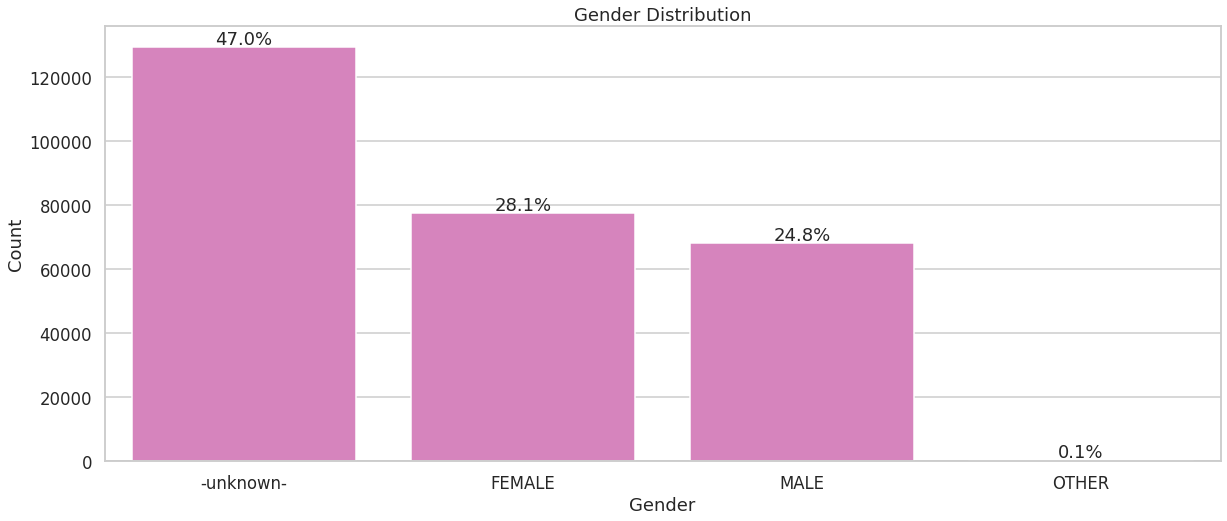

In [24]:
#gender
plt.figure(figsize=(20,8))
order1 = df_all['gender'].value_counts().index #put count in order1
sns.countplot(data = df_all, x = 'gender', order = order1, color = sns.color_palette()[6])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')


#to make %
order2 = df_all['gender'].value_counts()
for i in range(order2.shape[0]):   
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / df_all.shape[0])
    plt.text(i,count+1000,strt,ha='center')

Mac Desktop           106328
Windows Desktop        86948
iPhone                 39814
iPad                   18036
Other/Unknown          11167
Android Phone           9458
Android Tablet          2098
Desktop (Other)         1507
SmartPhone (Other)       191
Name: first_device_type, dtype: int64

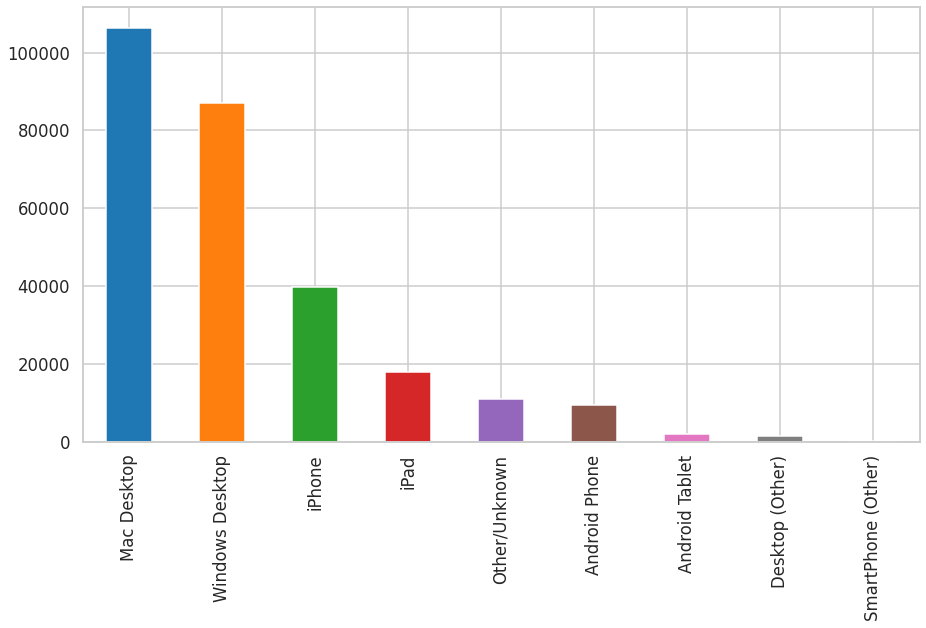

In [25]:
#first device type 
plt.figure(figsize = (15,8))
df_all.first_device_type.value_counts(dropna=True).plot(kind='bar',color = colors);

df_all['first_device_type'].value_counts()


Web        219918
iOS         34593
Android     10519
Moweb       10517
Name: signup_app, dtype: int64

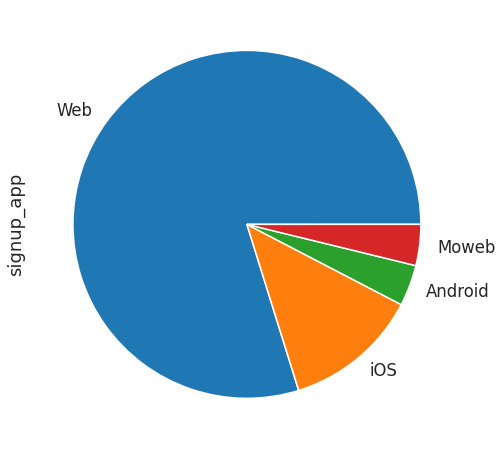

In [26]:
#signup app 
plt.figure(figsize = (15,8))
df_all.signup_app.value_counts(dropna=True).plot(kind='pie');
df_all['signup_app'].value_counts()


basic       198222
facebook     74864
google        2438
weibo           23
Name: signup_method, dtype: int64

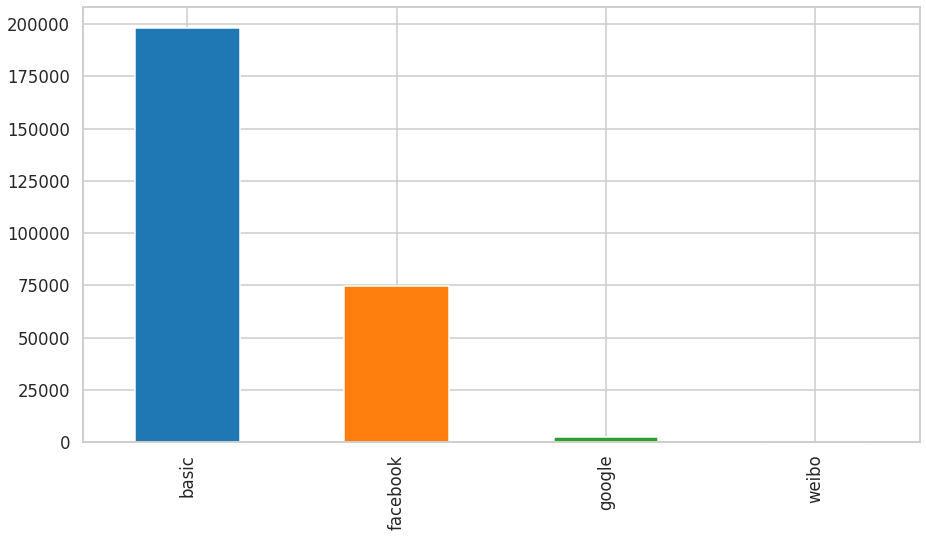

In [27]:
#signup method
plt.figure(figsize = (15,8))
df_all.signup_method.value_counts(dropna=True).plot(kind='bar',color = colors);
df_all['signup_method'].value_counts()


direct                 181270
google                  65956
other                   13036
facebook                 3996
bing                     3719
craigslist               3475
padmapper                 836
vast                      830
yahoo                     653
facebook-open-graph       566
gsp                       455
meetup                    358
email-marketing           270
naver                      66
baidu                      32
yandex                     18
wayn                        8
daum                        3
Name: affiliate_provider, dtype: int64

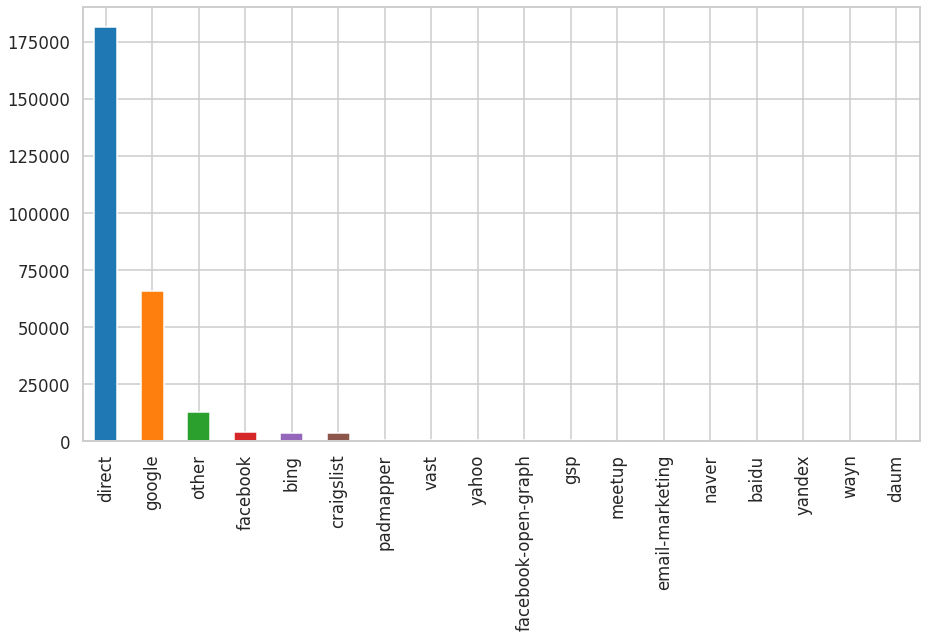

In [28]:
#affiliate provider
plt.figure(figsize = (15,8))
df_all.affiliate_provider.value_counts(dropna=True).plot(kind='bar',color = colors);
df_all['affiliate_provider'].value_counts()


NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

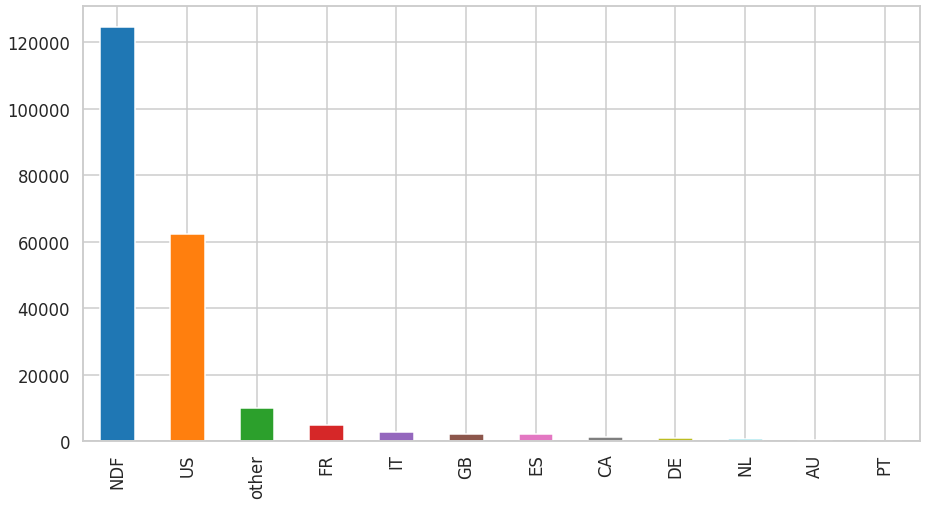

In [29]:
#country destination 
plt.figure(figsize = (15,8))
df_all.country_destination.value_counts(dropna=True).plot(kind='bar',color = colors);
df_all['country_destination'].value_counts()


0     206092
25     29834
12     11244
3       8822
2       6881
23      6408
24      4328
1       1047
8        315
6        301
21       197
5         36
20        14
16        11
15        10
14         4
10         2
4          1
Name: signup_flow, dtype: int64

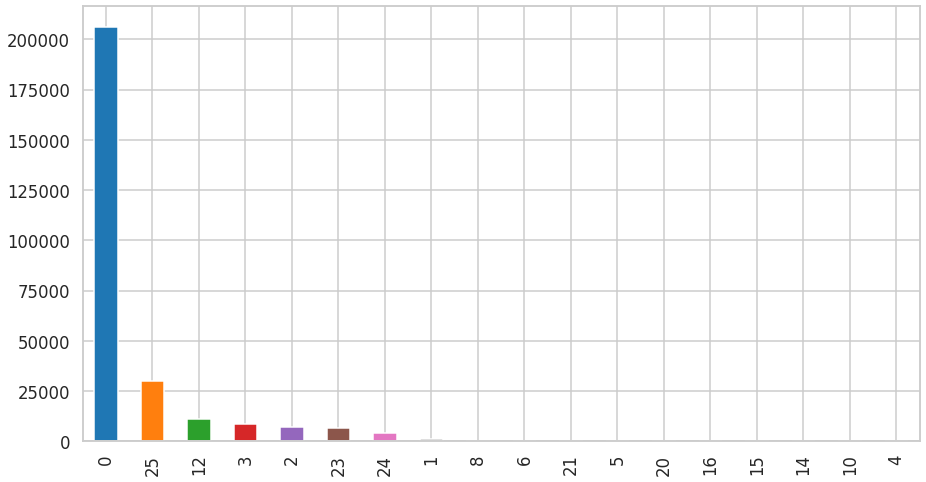

In [30]:
#signup flow 
plt.figure(figsize = (15,8))
df_all.signup_flow.value_counts(dropna=True).plot(kind='bar',color = colors);
df_all['signup_flow'].value_counts()


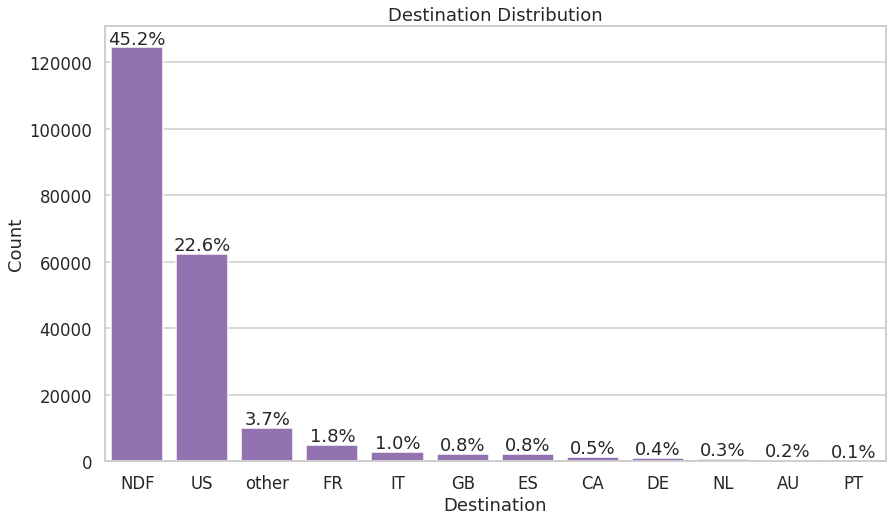

In [31]:
#country destination 
plt.figure(figsize=(14,8))
order1 = df_all['country_destination'].value_counts().index
sns.countplot(data = data1, x = 'country_destination', order = order1, color = sns.color_palette()[4])
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Destination Distribution')

#for make %
order2 = df_all['country_destination'].value_counts()
for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / df_all.shape[0])
    plt.text(i,count+1000,strt,ha='center') #1000 for % postision 


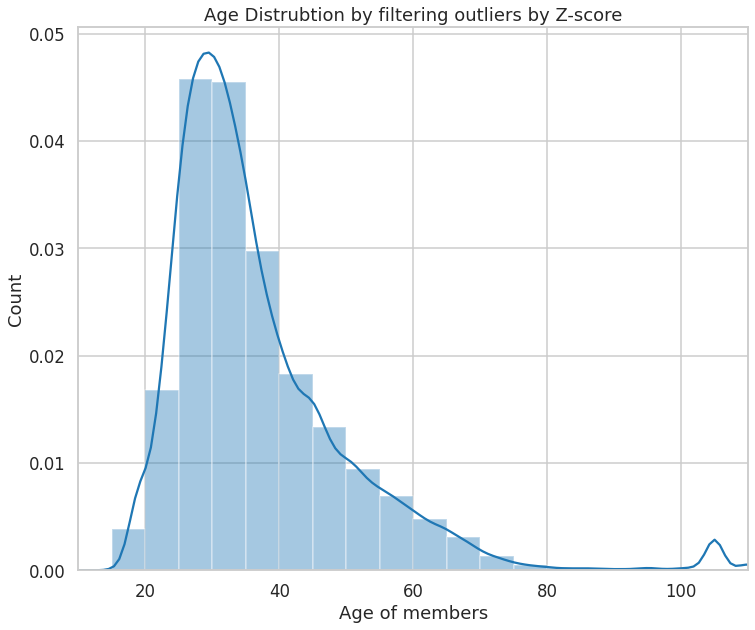

In [32]:
#Plotting Age distribution of the members
plt.figure(figsize=[12,10])
sns.distplot(df_no_outliers.age.dropna(),bins=np.arange(15,100,5),color=sns.color_palette()[0]); 
plt.xlabel('Age of members')
plt.ylabel('Count')
plt.title('Age Distrubtion by filtering outliers by Z-score')
plt.xlim(10,110);


## Bivariate Visualization

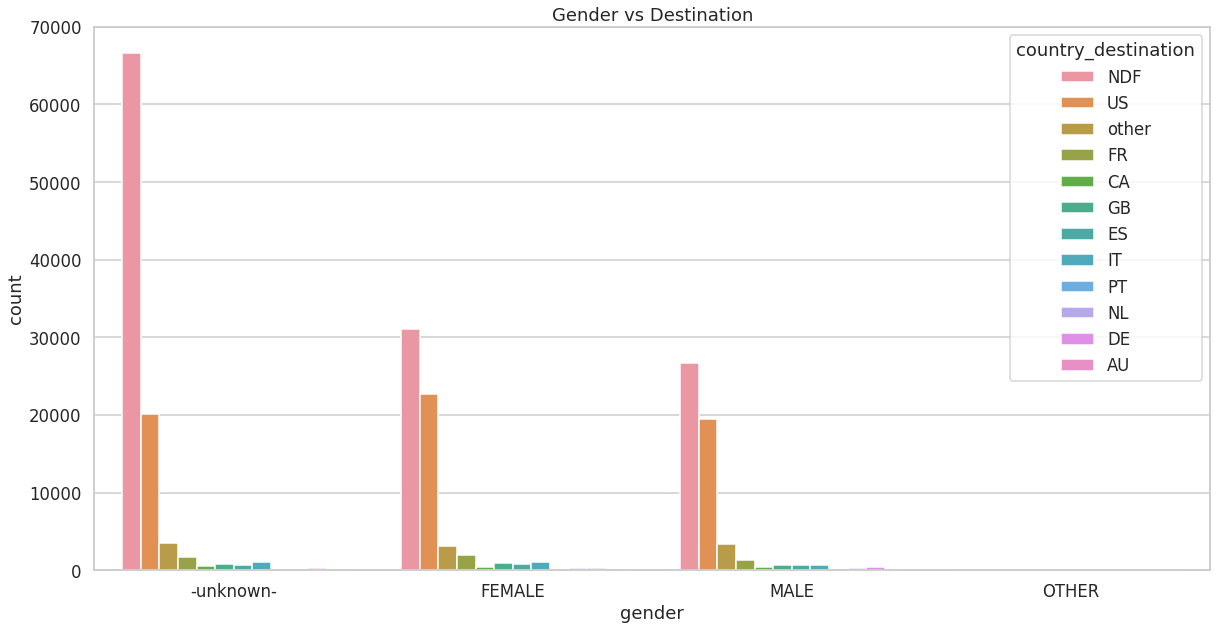

In [33]:
# gender share

plt.figure(figsize=(20,10))
ax = sns.countplot(x="gender", hue="country_destination", data=df_all)
plt.title("Gender vs Destination")
plt.show()

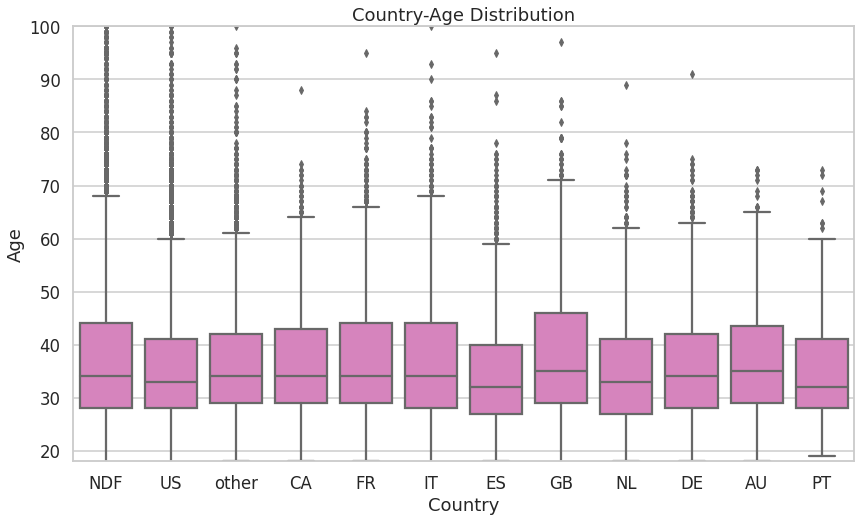

In [34]:
#Destination-Age distribution plot

plt.figure(figsize=[14,8])
sns.boxplot(data=df_no_outliers,y='age',x='country_destination',color=sns.color_palette()[6]);
plt.ylim(18,100)
plt.xlabel('Country');
plt.ylabel('Age');
plt.title('Country-Age Distribution');


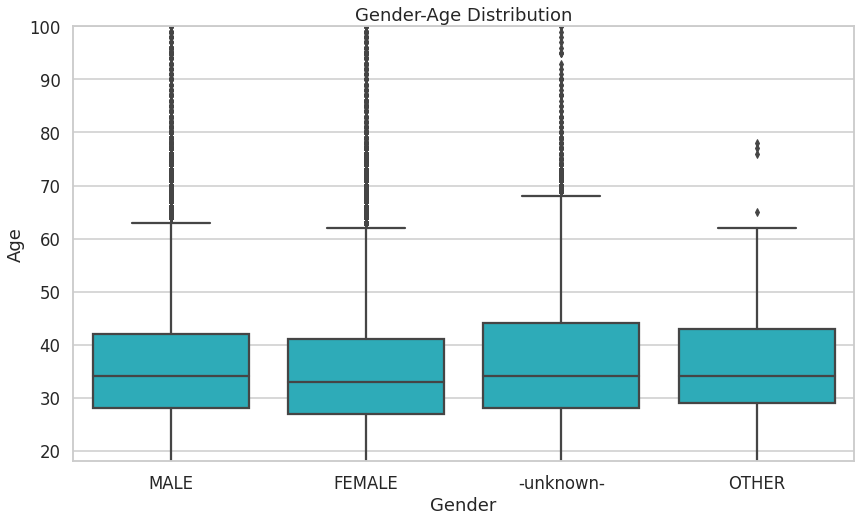

In [35]:
#Gender-Age Distribution plot

plt.figure(figsize=[14,8])
sns.boxplot(data=df_no_outliers,y='age',x='gender',color=sns.color_palette()[9]);
plt.ylim(18,100)
plt.xlabel('Gender');
plt.ylabel('Age');
plt.title('Gender-Age Distribution');

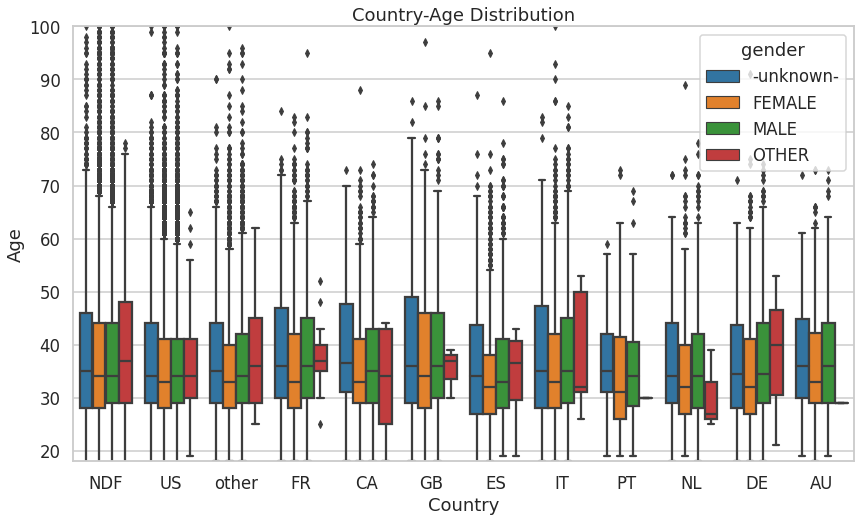

In [36]:
#Relation ship between age-gender-destination

plt.figure(figsize=[14,8])
sns.boxplot(data=df_all,y='age',x='country_destination',hue='gender');
plt.ylim(18,100)
plt.xlabel('Country');
plt.ylabel('Age');
plt.title('Country-Age Distribution');


## Summary
Merge train and test datasets 

1- in GENDER 
Unkown value (129480) 47% 
female(77524) 28% 
male(68209) 24% 
other (34) 0.1%

2- top 5 first device type
Mac Desktop           106328
Windows Desktop        86948
iPhone                 39814
iPad                   18036
Other/Unknown          11167

3-signup app
Web        219918
iOS         34593
Android     10519
Moweb       10517

4-signup method
basic       198222
facebook     74864
google        2438

5- top 5 affiliate provider
direct                 181270
google                  65956
other                   13036
facebook                 3996
bing                     3719

6- top 5 signup flow page
0     206092
25     29834
12     11244
3       8822
2       6881

7- top 5 country destination
NDF      124543 (No Destination Found ) 45%
US        62376 (22.6%)
other     10094 (3.7%)
FR         5023 (1.8%)
IT         2835 (1%)

8- account created years 
2014 (50.26%) 138562 most month july 
2013 (30.11%) 82960 most month september
2012 (14.32%) 39462
2011 (4.27%)  11775
2010 (1.01%)  2788
   
   
10 -More conclusions in bivariate analysis that graphs shows 

## lets Visualize some time coloums 

In [37]:
#Extracting year for date_account_created
df_all['acc_year'] = df_all['date_account_created'].dt.year #add coloum acc year

df1 = df_all.groupby('acc_year').count() #groupby data
df1.head()


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,zscore
acc_year,,,,,,,,,,,,,,,,,
2010,2788,2788,2788,1603,2788,1706,2788,2788,2788,2788,2788,2003,2788,2788,2788,2788,1706
2011,11775,11775,11775,6433,11775,7685,11775,11775,11775,11775,11775,9382,11775,11775,11775,11775,7685
2012,39462,39462,39462,17749,39462,25722,39462,39462,39462,39462,39462,38155,39462,39462,39462,39462,25722
2013,82960,82960,82960,33884,82960,48010,82960,82960,82960,82960,82960,82175,82960,82960,82960,82960,48010
2014,138562,138562,138562,29239,138562,75558,138562,138562,138562,138562,138562,137747,138562,138562,138562,76466,75558


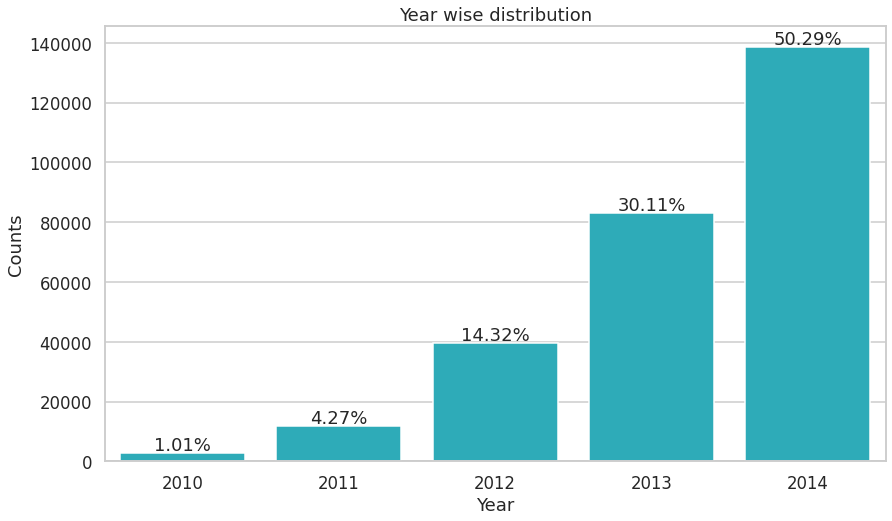

In [38]:
#Finding year distribution

years = [2010,2011,2012,2013,2014]
yearsOrder=pd.api.types.CategoricalDtype(ordered=True, categories=years)
df1.reset_index(inplace = True)
df1.acc_year = df1.acc_year.astype(yearsOrder)

plt.figure(figsize=[14,8])
sns.barplot(data=df1,x='acc_year',y='affiliate_provider',color=sns.color_palette()[9]);  #use any coloum in y as count
plt.title('Year wise distribution');
plt.xlabel('Year')
plt.ylabel('Counts')


for i in range(df1.shape[0]):
    count=df1.iloc[i]['affiliate_provider']
    strt='{:0.2f}%'.format(100*count/df_all.shape[0])
    plt.text(i,count+1000,strt,ha='center')

In [39]:
# Creating a month centered dataframe for 2014
df2 = df_all[df_all['date_account_created'].dt.year==2014]
df2['monthYear14'] = df2['date_account_created'].map(lambda x: x.strftime('%m-%Y')) #strftime from datetime library
df2 = df2.groupby('monthYear14').count()

df2.head()


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,zscore,acc_year
monthYear14,,,,,,,,,,,,,,,,,,
01-2014,11111,11111,11111,4142,11111,6050,11111,11111,11111,11111,11111,10823,11111,11111,11111,11111,6050,11111
02-2014,9967,9967,9967,3888,9967,5440,9967,9967,9967,9967,9967,9736,9967,9967,9967,9967,5440,9967
03-2014,12058,12058,12058,4622,12058,6739,12058,12058,12058,12058,12058,11820,12058,12058,12058,12058,6739,12058
04-2014,12689,12689,12689,4901,12689,7133,12689,12689,12689,12689,12689,12673,12689,12689,12689,12689,7133,12689
05-2014,14895,14895,14895,5754,14895,8198,14895,14895,14895,14895,14895,14879,14895,14895,14895,14895,8198,14895


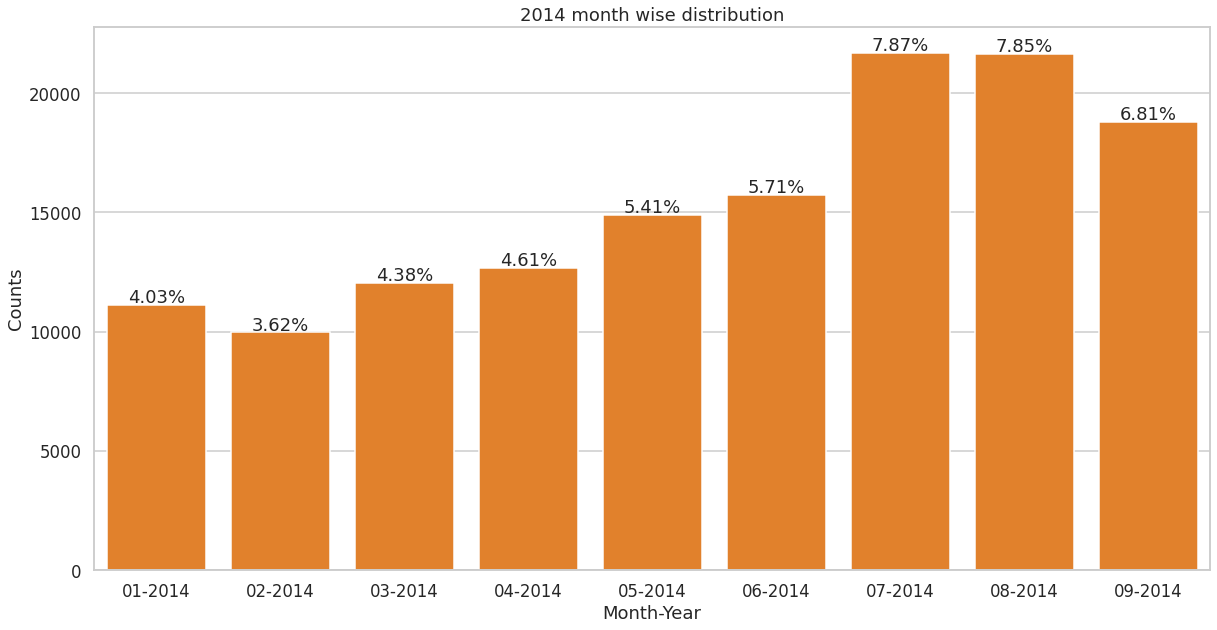

In [40]:
#Number of accounts created in different month of 2014

plt.figure(figsize=[20,10])
sns.barplot(data=df2,x=df2.index,y='affiliate_provider',color=sns.color_palette()[1]);
plt.title('2014 month wise distribution');
plt.xlabel('Month-Year')
plt.ylabel('Counts')

for i in range(df2.shape[0]):
    count=df2.iloc[i]['affiliate_provider']
    strt='{:0.2f}%'.format(100*count/df_all.shape[0])
    plt.text(i,count+100,strt,ha='center')

    #we noted that the dataset ended from collection at sep 2014

In [41]:
# Creating a month centered dataframe for 2013

df3 = df_all[df_all['date_account_created'].dt.year==2013]
df3['monthYear13'] = df3['date_account_created'].map(lambda x: x.strftime('%m-%Y'))
df3 = df3.groupby('monthYear13').count()
df3.head()


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,zscore,acc_year
monthYear13,,,,,,,,,,,,,,,,,,
01-2013,4418,4418,4418,1859,4418,2883,4418,4418,4418,4418,4418,4405,4418,4418,4418,4418,2883,4418
02-2013,4362,4362,4362,1961,4362,2733,4362,4362,4362,4362,4362,4351,4362,4362,4362,4362,2733,4362
03-2013,5421,5421,5421,2434,5421,3153,5421,5421,5421,5421,5421,5399,5421,5421,5421,5421,3153,5421
04-2013,5855,5855,5855,2531,5855,3688,5855,5855,5855,5855,5855,5822,5855,5855,5855,5855,3688,5855
05-2013,6721,6721,6721,2910,6721,4257,6721,6721,6721,6721,6721,6667,6721,6721,6721,6721,4257,6721


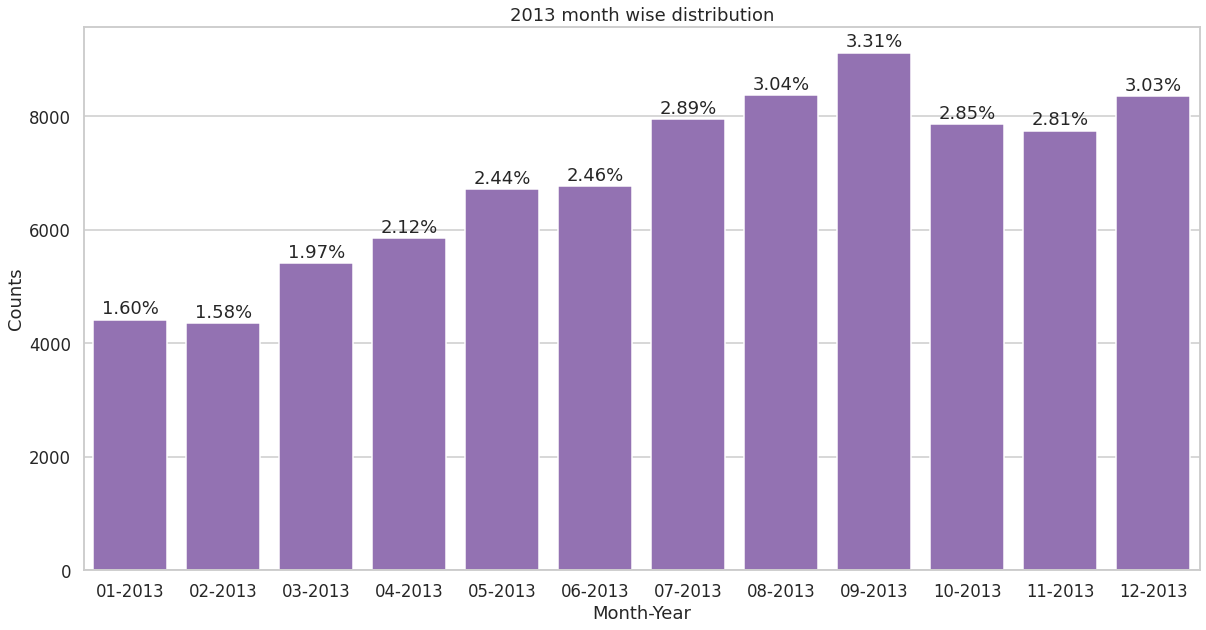

In [42]:
#Number of accounts created in different month of 2013

plt.figure(figsize=[20,10])
sns.barplot(data=df3,x=df3.index,y='country_destination',color=sns.color_palette()[4]);
plt.title('2013 month wise distribution');
plt.xlabel('Month-Year')
plt.ylabel('Counts')

for i in range(df3.shape[0]):
    count=df3.iloc[i]['affiliate_provider']
    strt='{:0.2f}%'.format(100*count/df_all.shape[0])
    plt.text(i,count+100,strt,ha='center')

In [43]:
#Dividing member ages into various bins

df_all['member_age_bins']=df_all['age'].apply(lambda x: '18 - 20' if 18<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60-70' if 60<x<=70
                                                  else '70+' if 70<x<=100
                                                  else np.nan)

df_all.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,zscore,acc_year,member_age_bins
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,2010,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,-0.064119,2011,30 - 40
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,0.062082,2010,50 - 60
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,-0.036075,2011,40 - 50
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,-0.043086,2010,40 - 50


In [44]:
#account created month in 2013 only according to member age bins 
df3 = df_all[df_all['date_account_created'].dt.year==2013]
df3['monthYear13'] = df3['date_account_created'].map(lambda x: x.strftime('%m-%Y'))

df3= df3.groupby(['monthYear13','member_age_bins']).count()

df3.reset_index(inplace=True) # to inplace coloum in dataset
df3.head()

,monthYear13,member_age_bins,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,zscore,acc_year
0,01-2013,18 - 20,20,20,20,8,20,20,20,20,20,20,20,20,20,20,20,20,20,20
1,01-2013,20 - 30,827,827,827,455,827,827,827,827,827,827,827,827,827,827,827,827,827,827
2,01-2013,30 - 40,1095,1095,1095,581,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095
3,01-2013,40 - 50,474,474,474,203,474,474,474,474,474,474,474,474,474,474,474,474,474,474
4,01-2013,50 - 60,232,232,232,103,232,232,232,232,232,232,232,232,232,232,232,232,232,232


Text(0, 0.5, 'Counts')

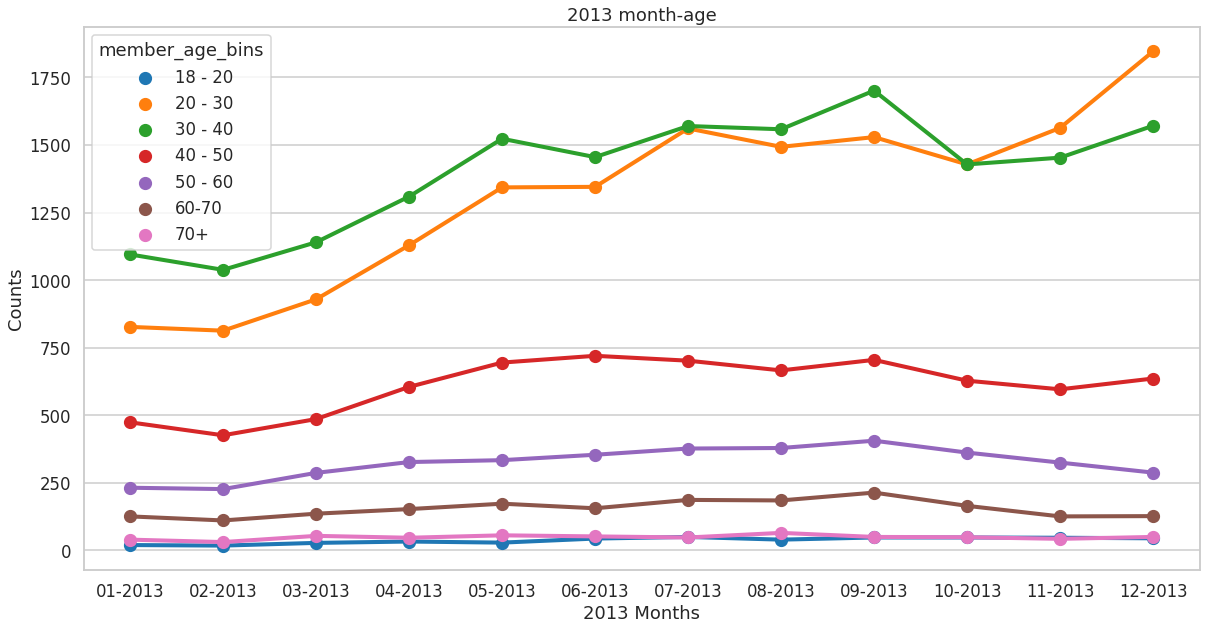

In [45]:
#Age wise distribution of the booking in different months of 2013

plt.figure(figsize=[20,10])
sns.pointplot(data=df3,x='monthYear13',y='affiliate_provider',hue='member_age_bins');
plt.title('2013 month-age');
plt.xlabel('2013 Months')
plt.ylabel('Counts')


In [46]:
#account created month in 2013 only accoording to gender 

df3 = df_all[df_all['date_account_created'].dt.year==2013]
df3['monthYear13'] = df3['date_account_created'].map(lambda x: x.strftime('%m-%Y'))

df3= df3.groupby(['monthYear13','gender']).count() #this time with gender

df3.reset_index(inplace=True)

Text(0, 0.5, 'Counts')

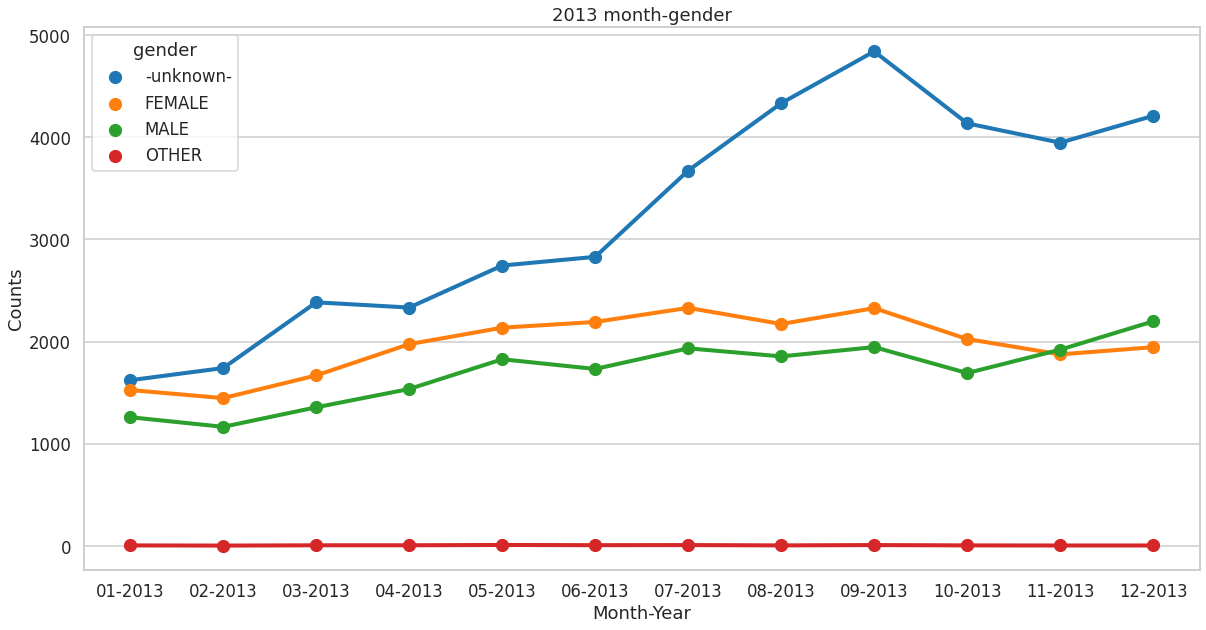

In [47]:
#Gender wise distribution of the booking in different months of 2013

plt.figure(figsize=[20,10])
sns.pointplot(data=df3,x='monthYear13',y='affiliate_provider',hue='gender');
plt.title('2013 month-gender');
plt.xlabel('Month-Year')
plt.ylabel('Counts')


## Time Series 

<AxesSubplot:>

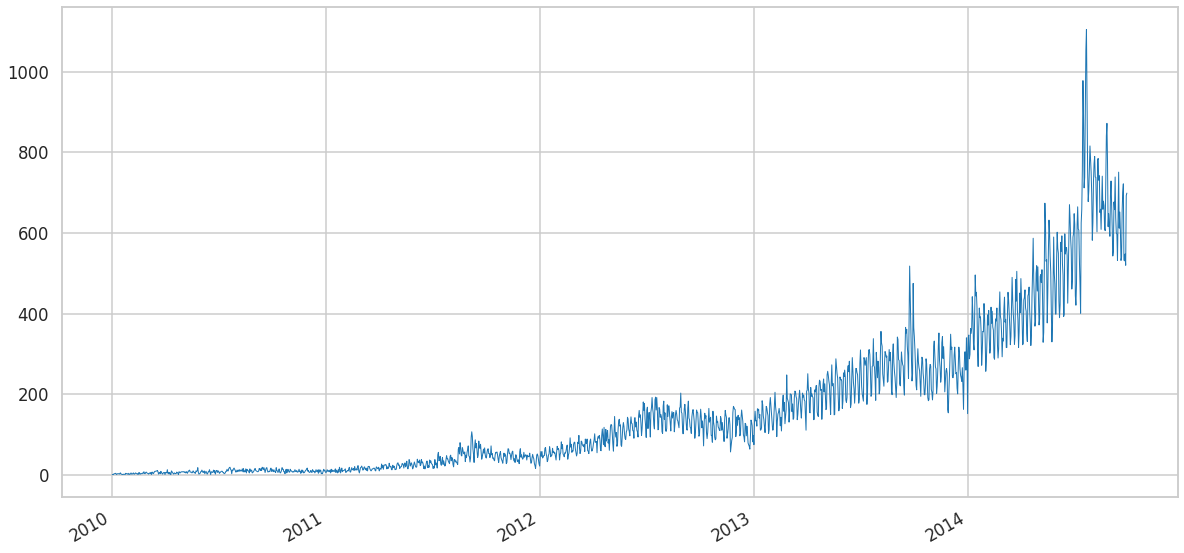

In [48]:
plt.figure(figsize=(20,10))
df_all.date_account_created.value_counts().plot(kind='line', linewidth=1, color='#1f77b4')

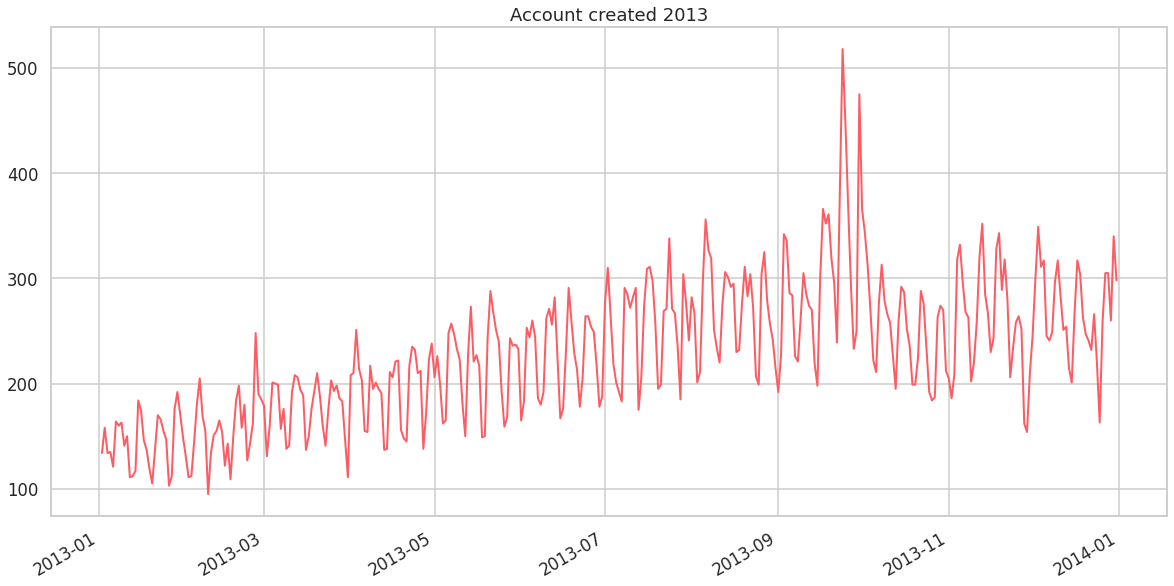

In [49]:
plt.figure(figsize=(20,10))
account_2013 = df_all[df_all['date_account_created'] > pd.to_datetime(20130101, format='%Y%m%d')]
account_2013 = account_2013[account_2013['date_account_created'] < pd.to_datetime(20140101, format='%Y%m%d')]
account_2013.date_account_created.value_counts(dropna=True).plot(kind='line', linewidth=2, color='#FD5C64',title="Account created 2013")
plt.show()


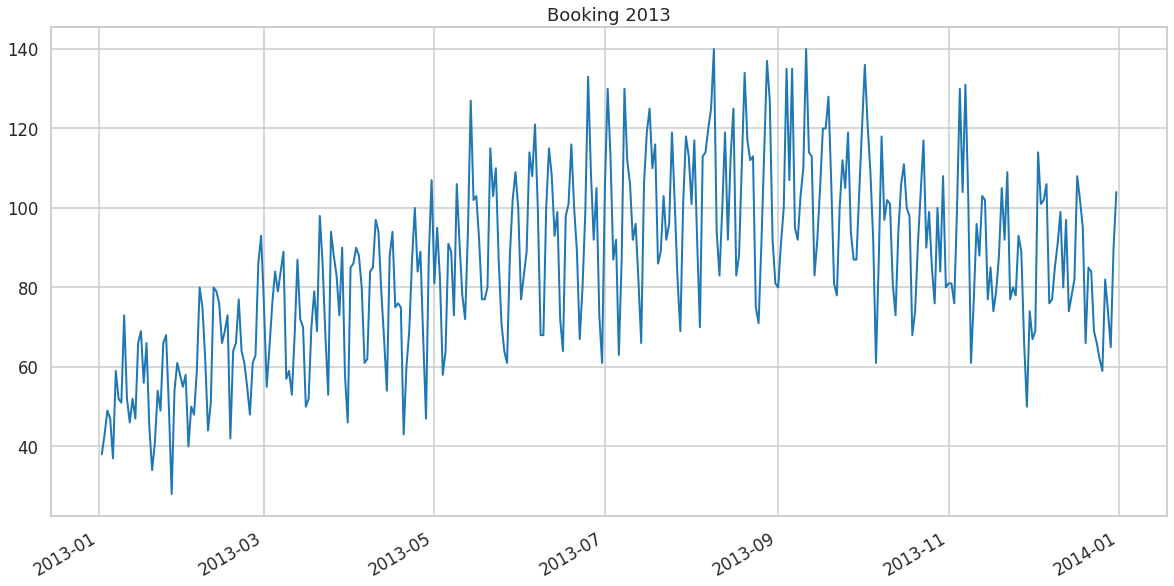

In [50]:
plt.figure(figsize=(20,10))
booking_2013 = df_all[df_all['date_first_booking'] > pd.to_datetime(20130101, format='%Y%m%d')]
booking_2013 = booking_2013[booking_2013['date_first_booking'] < pd.to_datetime(20140101, format='%Y%m%d')]
booking_2013.date_first_booking.value_counts(dropna=True).plot(kind='line', linewidth=2,title="Booking 2013")
plt.show()


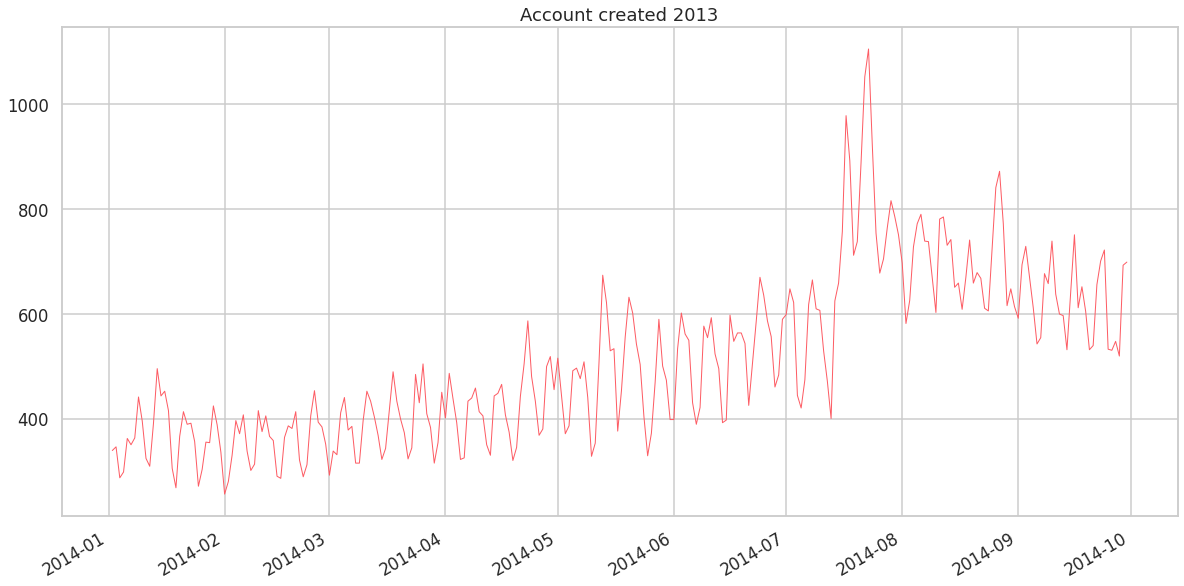

In [51]:
plt.figure(figsize=(20,10))
account_2014 = df_all[df_all['date_account_created'] > pd.to_datetime(20140101, format='%Y%m%d')]
account_2014 = account_2014[account_2014['date_account_created'] < pd.to_datetime(20150101, format='%Y%m%d')]
account_2014.date_account_created.value_counts(dropna=True).plot(kind='line', linewidth=1, color='#FD5C64',title="Account created 2013")
plt.show()


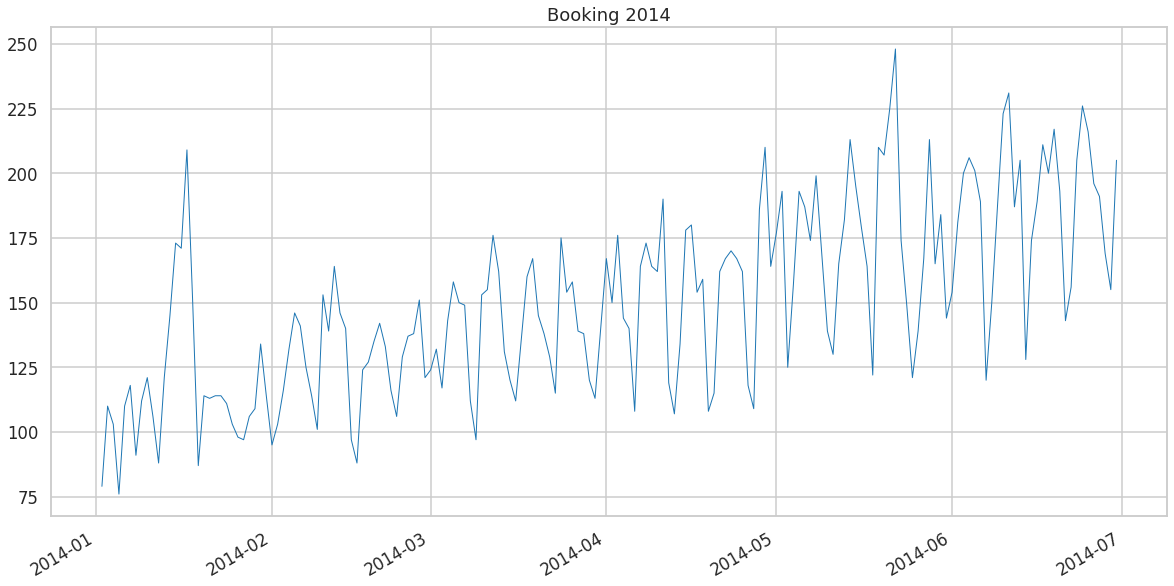

In [52]:
plt.figure(figsize=(20,10))
booking_2014= df_all[df_all['date_first_booking'] > pd.to_datetime(20140101, format='%Y%m%d')]
booking_2014 = booking_2014[booking_2014['date_first_booking'] < pd.to_datetime(20140701, format='%Y%m%d')]
booking_2014.date_first_booking.value_counts(dropna=True).plot(kind='line', linewidth=1,title="Booking 2014")
plt.show()


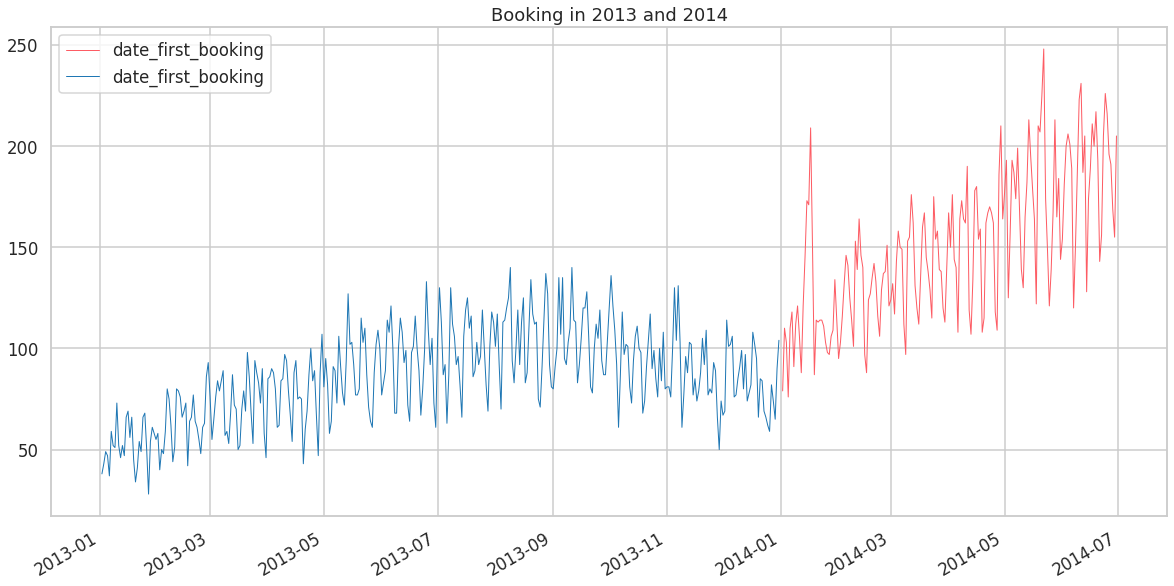

In [98]:
plt.figure(figsize=(20,10))
booking_2014.date_first_booking.value_counts(dropna=True).plot(kind='line', linewidth=1, color='#FD5C64')
booking_2013.date_first_booking.value_counts(dropna=True).plot(kind='line', linewidth=1,title="Booking in 2013 and 2014")
plt.legend()



# Here we notice that booking increase in summer and decrease in winter months 

## KNN 

In [54]:
# we will build model on training dataset only 
data1.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [55]:
#converting string to datetime 
data1['date_account_created'] = pd.to_datetime(data1['date_account_created'])
data1['date_first_booking'] = pd.to_datetime(data1['date_first_booking'])
data1['timestamp_first_active'] = pd.to_datetime(data1['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [56]:
# splitting year and month to coloums 
data1['account_year'] = data1['date_account_created'].dt.year
data1['account_month'] = data1['date_account_created'].dt.month
data1['booking_year'] = data1['date_first_booking'].dt.year
data1['booking_month'] = data1['date_first_booking'].dt.month
data1['firstActive_year'] = data1['timestamp_first_active'].dt.year
data1['firstActive_month'] = data1['timestamp_first_active'].dt.month

data1.head(10)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,signup_app,first_device_type,first_browser,country_destination,account_year,account_month,booking_year,booking_month,firstActive_year,firstActive_month
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,...,Web,Mac Desktop,Chrome,NDF,2010,6,NaN,NaN,2009,3
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,...,Web,Mac Desktop,Chrome,NDF,2011,5,NaN,NaN,2009,5
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,Web,Windows Desktop,IE,US,2010,9,2010.0,8.0,2009,6
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,Web,Mac Desktop,Firefox,other,2011,12,2012.0,9.0,2009,10
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,Web,Mac Desktop,Chrome,US,2010,9,2010.0,2.0,2009,12
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-unknown-,NaN,basic,0,en,other,...,Web,Mac Desktop,Chrome,US,2010,1,2010.0,1.0,2010,1
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,...,Web,Mac Desktop,Safari,US,2010,1,2010.0,1.0,2010,1
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,...,Web,Mac Desktop,Safari,US,2010,1,2010.0,1.0,2010,1
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50.0,basic,0,en,other,...,Web,Mac Desktop,Safari,US,2010,1,2010.0,7.0,2010,1
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,-unknown-,46.0,basic,0,en,other,...,Web,Mac Desktop,Firefox,US,2010,1,2010.0,1.0,2010,1


In [57]:
#clean data and drop unnecessary columns and null values
dataaa=data1.drop(['id','timestamp_first_active','date_account_created','date_first_booking'], axis=1)
dataa=dataaa.dropna(axis=0)
dataa.head(10)

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_year,account_month,booking_year,booking_month,firstActive_year,firstActive_month
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2010,9,2010.0,8.0,2009,6
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2011,12,2012.0,9.0,2009,10
4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2010,9,2010.0,2.0,2009,12
6,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010,1,2010.0,1.0,2010,1
7,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,2010,1,2010.0,1.0,2010,1
8,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010,1,2010.0,7.0,2010,1
9,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US,2010,1,2010.0,1.0,2010,1
10,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Firefox,US,2010,1,2010.0,1.0,2010,1
15,FEMALE,33.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,CA,2010,1,2010.0,1.0,2010,1
19,FEMALE,29.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,FR,2010,1,2010.0,1.0,2010,1


In [99]:
dataa.shape

(68171, 18)

In [58]:
#import necessary libraries for knn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [59]:
#spliting dataset coloums as x contains all data except country destination and keep it in y
x = dataa.drop(columns=['country_destination'])
y = dataa['country_destination'].values

#encode dataset 
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)
x= x.apply(LabelEncoder().fit_transform)

In [60]:
#split data to train (80%) and test (20%) for y and x 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)


Text(0, 0.5, 'testing accuracy')

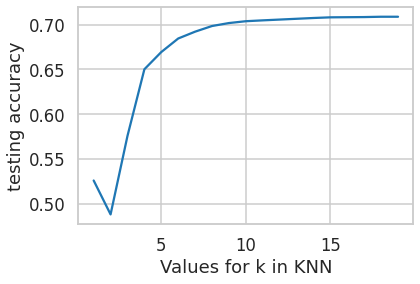

In [61]:
#make this plot to know what is the best k to set for best accuracy
from sklearn import metrics

k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train , y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test , y_pred) )

plt.plot(k_range , scores)
plt.xlabel('Values for k in KNN')
plt.ylabel('testing accuracy')

In [62]:
knn = KNeighborsClassifier(n_neighbors = 10,weights="uniform",algorithm="auto")  #weight can be distance , algorithm can be ball_tree,kd_tree,brute

knn.fit(x_train,y_train)

knn.predict(x_test)


knn.score(x_test, y_test)


0.7038503850385038

In [63]:
knn.score(x_train, y_train)


0.7101180871351034

## Forcasting Time series

In [64]:
data=pd.read_csv('../input/airbnb-recruiting-new-user-bookings/train_users_2.csv.zip') #train 

In [65]:
datta = data[["date_first_booking","country_destination"]]

In [66]:
datta.head(10)

,date_first_booking,country_destination
0,NaN,NDF
1,NaN,NDF
2,2010-08-02,US
3,2012-09-08,other
4,2010-02-18,US
5,2010-01-02,US
6,2010-01-05,US
7,2010-01-13,US
8,2010-07-29,US
9,2010-01-04,US


In [67]:
dataT=datta.dropna(axis=0)
dataT.head(20)

,date_first_booking,country_destination
2,2010-08-02,US
3,2012-09-08,other
4,2010-02-18,US
5,2010-01-02,US
6,2010-01-05,US
7,2010-01-13,US
8,2010-07-29,US
9,2010-01-04,US
10,2010-01-06,US
12,2010-01-18,FR


In [68]:
dataT['date_first_booking'] = pd.to_datetime(dataT['date_first_booking'])
dataT.head(20)


,date_first_booking,country_destination
2,2010-08-02,US
3,2012-09-08,other
4,2010-02-18,US
5,2010-01-02,US
6,2010-01-05,US
7,2010-01-13,US
8,2010-07-29,US
9,2010-01-04,US
10,2010-01-06,US
12,2010-01-18,FR


In [69]:
dataT=dataT.groupby('date_first_booking').count()

In [70]:
dataT.head(20)

,country_destination
date_first_booking,
2010-01-02,1
2010-01-04,1
2010-01-05,1
2010-01-06,1
2010-01-08,1
2010-01-09,1
2010-01-10,1
2010-01-11,2
2010-01-13,2


In [71]:
dataT.shape

(1976, 1)

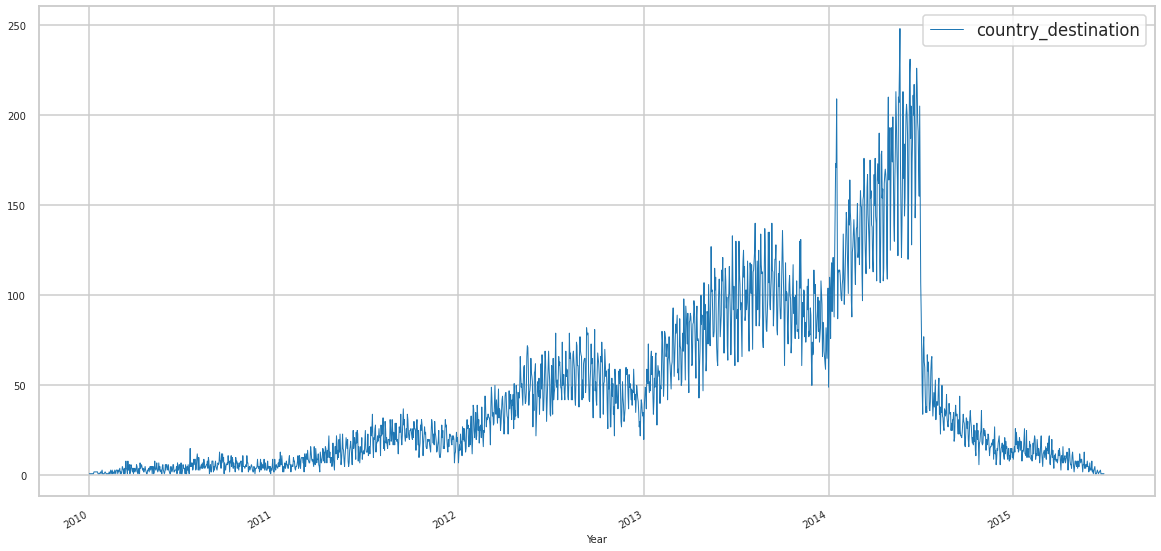

In [72]:
dataT[['country_destination']].plot(figsize=(20,10), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);


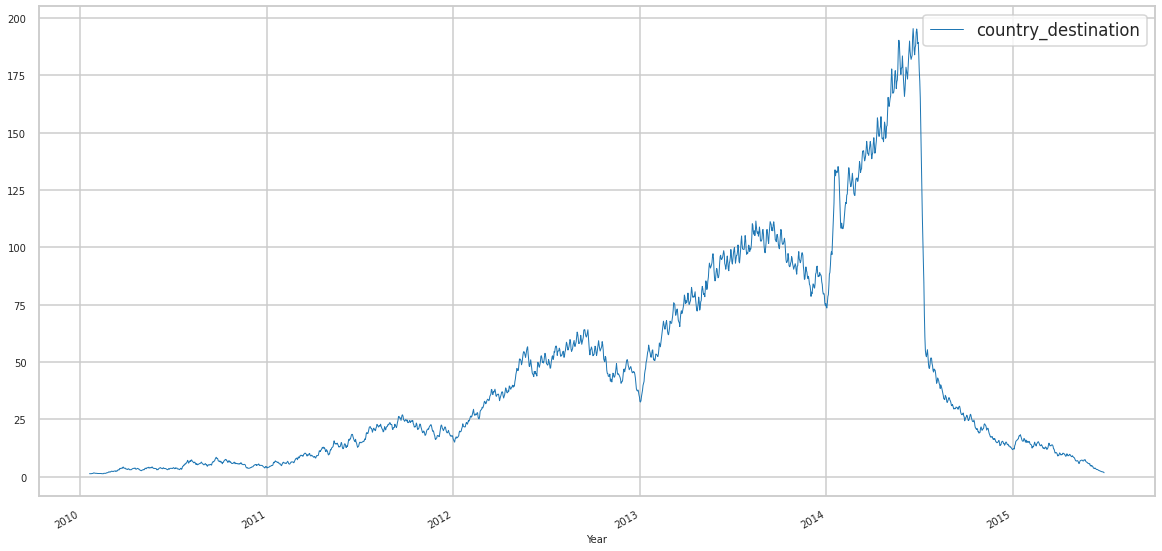

In [73]:
country = dataT[['country_destination']]
country.rolling(12).mean().plot(figsize=(20,10), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);


In [74]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller


In [75]:
test_result=adfuller(dataT['country_destination'])


In [76]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(country_destination):
    result=adfuller(country_destination)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    


In [77]:
adfuller_test(dataT['country_destination'])


ADF Test Statistic : -1.6100409602971795
p-value : 0.4779541487408083
#Lags Used : 26
Number of Observations Used : 1949
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [78]:
dataT['country_month'] = dataT['country_destination'] - dataT['country_destination'].shift(1)


In [79]:
dataT['country_destination'].shift(1)


date_first_booking
2010-01-02    NaN
2010-01-04    1.0
2010-01-05    1.0
2010-01-06    1.0
2010-01-08    1.0
             ... 
2015-06-23    3.0
2015-06-25    1.0
2015-06-26    1.0
2015-06-28    1.0
2015-06-29    1.0
Name: country_destination, Length: 1976, dtype: float64

In [80]:
dataT['counrty_year']=dataT['country_destination']-dataT['country_destination'].shift(12)


In [81]:
dataT.head(14)


,country_destination,country_month,counrty_year
date_first_booking,,,
2010-01-02,1,NaN,NaN
2010-01-04,1,0.0,NaN
2010-01-05,1,0.0,NaN
2010-01-06,1,0.0,NaN
2010-01-08,1,0.0,NaN
2010-01-09,1,0.0,NaN
2010-01-10,1,0.0,NaN
2010-01-11,2,1.0,NaN
2010-01-13,2,0.0,NaN


In [82]:
## Again test dickey fuller test
adfuller_test(dataT['counrty_year'].dropna())


ADF Test Statistic : -7.147574685692281
p-value : 3.202955069714842e-10
#Lags Used : 26
Number of Observations Used : 1937
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='date_first_booking'>

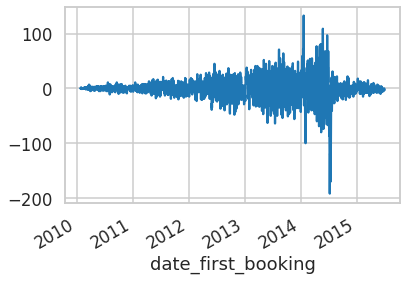

In [83]:
dataT['counrty_year'].plot()


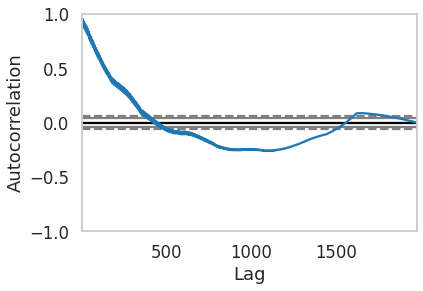

In [84]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dataT['country_destination'])
plt.show()


In [85]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


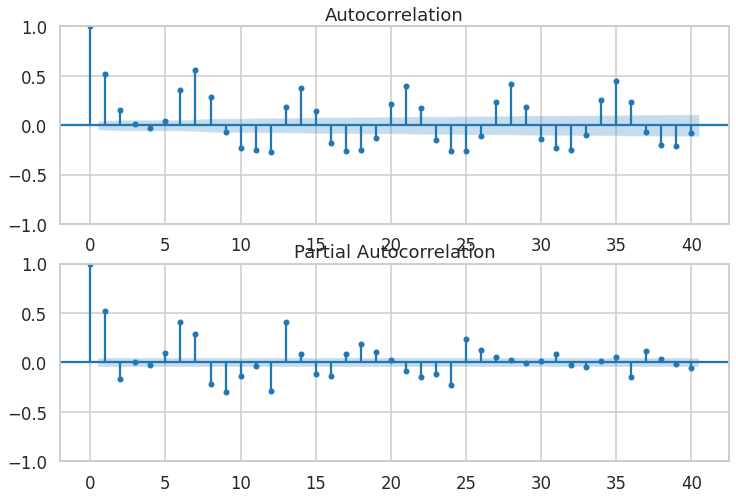

In [86]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataT['counrty_year'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataT['counrty_year'].iloc[13:],lags=40,ax=ax2)


In [87]:
# For non-seasonal data
#p=1, d=1, q=1
from statsmodels.tsa.arima_model import ARIMA


In [88]:
from statsmodels.tsa.arima.model import ARIMA #new library

model=ARIMA(dataT['country_destination'],order=(1,1,1))
model_fit=model.fit()


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


model_fit.summary()


<AxesSubplot:xlabel='date_first_booking'>

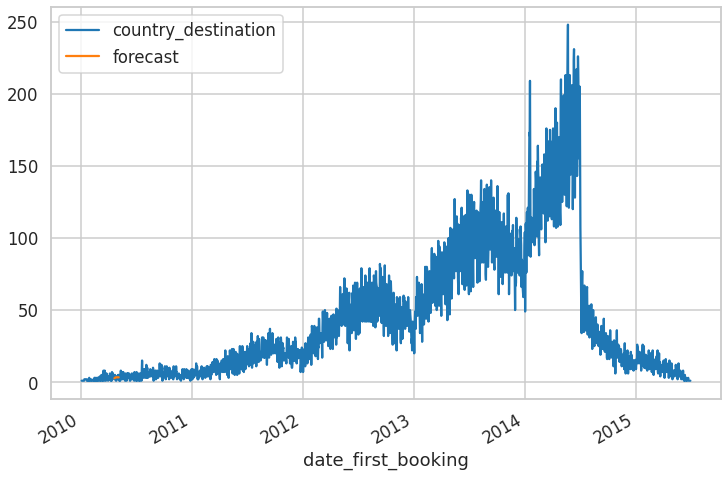

In [90]:
dataT['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
dataT[['country_destination','forecast']].plot(figsize=(12,8))


In [91]:
model=sm.tsa.statespace.SARIMAX(dataT['country_destination'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17087D+00    |proj g|=  1.15553D-01

At iterate    5    f=  3.97396D+00    |proj g|=  1.30701D-01

At iterate   10    f=  3.93107D+00    |proj g|=  1.13443D-01

At iterate   15    f=  3.90820D+00    |proj g|=  1.00727D-03

At iterate   20    f=  3.90807D+00    |proj g|=  6.78124D-03

At iterate   25    f=  3.90720D+00    |proj g|=  1.20047D-03

At iterate   30    f=  3.90709D+00    |proj g|=  4.18682D-04

At iterate   35    f=  3.90708D+00    |proj g|=  6.05023D-04

At iterate   40    f=  3.90708D+00    |proj g|=  3.01088D-04

At iterate   45    f=  3.90708D+00    |proj g|=  1.67967D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

<AxesSubplot:xlabel='date_first_booking'>

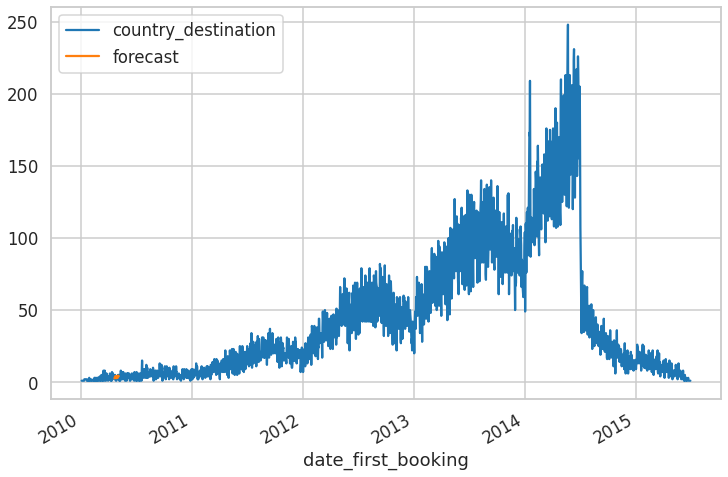

In [92]:
dataT['forecast']=results.predict(start=90,end=103,dynamic=True)
dataT[['country_destination','forecast']].plot(figsize=(12,8))


In [93]:
from pandas.tseries.offsets import DateOffset
future_dates=[dataT.index[-1]+ DateOffset(months=x)for x in range(0,24)]


In [94]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataT.columns)


In [95]:
future_datest_df.tail()


,country_destination,country_month,counrty_year,forecast
2017-01-29,NaN,NaN,NaN,NaN
2017-02-28,NaN,NaN,NaN,NaN
2017-03-29,NaN,NaN,NaN,NaN
2017-04-29,NaN,NaN,NaN,NaN
2017-05-29,NaN,NaN,NaN,NaN


In [96]:
future_df=pd.concat([dataT,future_datest_df])


<AxesSubplot:>

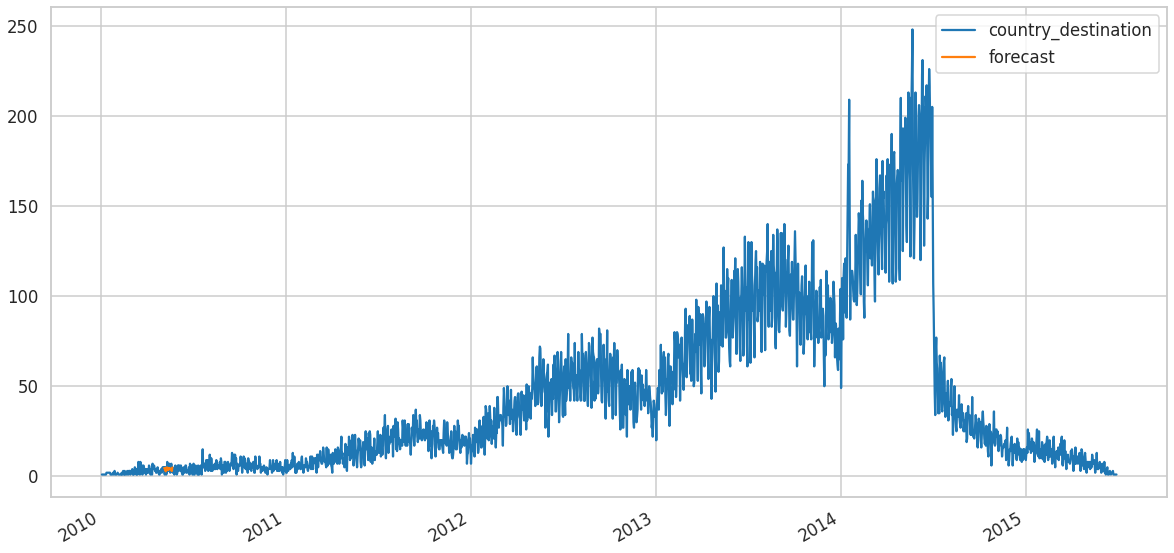

In [97]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['country_destination', 'forecast']].plot(figsize=(20, 10)) 
